# ENTREGABLE 4

# INSTRUCCIONES

Utilizar el archivo CSV (`dataset_banco_clean.csv`) con 45189 filas y 17 columnas y aplicar las técnicas de normalización del entregable 3.

In [13]:
# imports
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd

In [14]:
ruta = "dataset_banco_clean.csv"
df = pd.read_csv(ruta)

# Objetivo

Generar un model de clasificación capaz de predecir la clase de flor en función de las carácterísticas del dataset

* Aplicar las técnicas oportunas de procesamiento de datos

* Generar split de los datos

* Valorar diferentes modelos de clasificación

* Comparación entre modelos

* Ensemble

* Métricas

* Conclusiones finales

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45189 entries, 0 to 45188
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45189 non-null  int64  
 1   job        45189 non-null  object 
 2   marital    45189 non-null  object 
 3   education  45189 non-null  object 
 4   default    45189 non-null  object 
 5   balance    45189 non-null  float64
 6   housing    45189 non-null  object 
 7   loan       45189 non-null  object 
 8   contact    45189 non-null  object 
 9   day        45189 non-null  int64  
 10  month      45189 non-null  object 
 11  duration   45189 non-null  float64
 12  campaign   45189 non-null  int64  
 13  pdays      45189 non-null  float64
 14  previous   45189 non-null  int64  
 15  poutcome   45189 non-null  object 
 16  y          45189 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 5.9+ MB


In [16]:
# Verificar si hay datos faltantes
missing_values = df.isnull().sum()

# Mostrar datos faltantes
print(missing_values)

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [18]:
from sklearn.preprocessing import LabelEncoder

# Identificar columnas categóricas
categorical_cols = df.select_dtypes(include=['object']).columns

# Aplicar Label Encoding a cada columna categórica
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Verificar los cambios
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143.0,1,0,2,5,8,261.0,1,-1.0,0,3,0
1,44,9,2,1,0,29.0,1,0,2,5,8,151.0,1,-1.0,0,3,0
2,33,2,1,1,0,2.0,1,1,2,5,8,76.0,1,-1.0,0,3,0
3,47,1,1,3,0,1506.0,1,0,2,5,8,92.0,1,-1.0,0,3,0
4,33,11,2,3,0,1.0,0,0,2,5,8,198.0,1,-1.0,0,3,0


## Split

In [19]:
from sklearn.model_selection import train_test_split

# Separar características (X) y objetivo (y)
X = df.drop('y', axis=1)
y = df['y']

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


## Valoracion de Modelos

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Lista de modelos
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC()
}

# Entrenar y evaluar cada modelo
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy

# Mostrar resultados
for model_name, accuracy in results.items():
    print(f"{model_name}: {accuracy:.2f}")


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression: 0.89
Random Forest: 0.91
Support Vector Machine: 0.88


## Comparacion de modelos

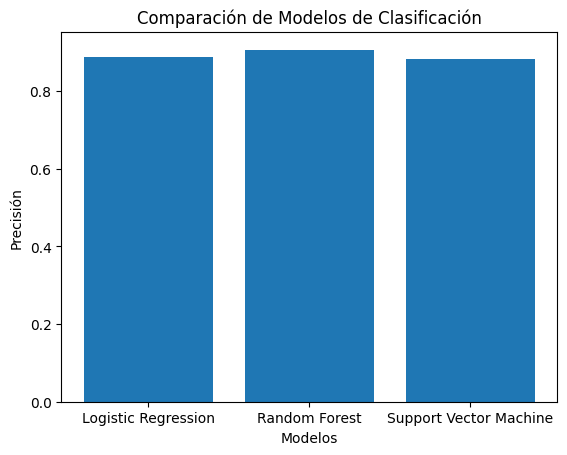

In [21]:
import matplotlib.pyplot as plt

# Comparar los resultados de precisión
plt.bar(results.keys(), results.values())
plt.xlabel('Modelos')
plt.ylabel('Precisión')
plt.title('Comparación de Modelos de Clasificación')
plt.show()


## Modelos Esemble

In [22]:
from sklearn.ensemble import VotingClassifier

# Crear el ensemble
ensemble_model = VotingClassifier(estimators=[
    ('lr', LogisticRegression()),
    ('rf', RandomForestClassifier()),
    ('svc', SVC())
], voting='hard')

# Entrenar y evaluar el modelo ensemble
ensemble_model.fit(X_train, y_train)
ensemble_y_pred = ensemble_model.predict(X_test)
ensemble_accuracy = accuracy_score(y_test, ensemble_y_pred)

print(f"Ensemble Model Accuracy: {ensemble_accuracy:.2f}")


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Ensemble Model Accuracy: 0.89


In [23]:
from sklearn.metrics import classification_report, confusion_matrix

# Reporte de clasificación para el modelo ensemble
print("Ensemble Model Classification Report")
print(classification_report(y_test, ensemble_y_pred))

# Matriz de confusión para el modelo ensemble
print("Ensemble Model Confusion Matrix")
print(confusion_matrix(y_test, ensemble_y_pred))


Ensemble Model Classification Report
              precision    recall  f1-score   support

           0       0.89      0.99      0.94     11971
           1       0.62      0.12      0.21      1586

    accuracy                           0.89     13557
   macro avg       0.76      0.56      0.57     13557
weighted avg       0.86      0.89      0.85     13557

Ensemble Model Confusion Matrix
[[11851   120]
 [ 1391   195]]


# Conclusiones

- El modelo **Random Forest** mostro tener una mejor precision dando como resultado 91%
- El modelo **Esemble** combino las predicciones de varios modelos pero su precision fue inferior de un 89%, por lo tanto es inferior a **Random Forest**